# Lecture 11 - SciPy

# CODE 010118

[SciPy](https://docs.scipy.org/doc/scipy/) (which stands for SCIentific PYthon) is a collection of mathematical algorithms and convenience functions built on the [NumPy](https://numpy.org/doc/stable/) extension of Python. It is built on top of [NumPy](https://numpy.org/doc/stable/), and extends it's functionality.

Today, we are going to look at three [SciPy](https://docs.scipy.org/doc/scipy/) modules -- the ones for [integration](https://docs.scipy.org/doc/scipy/tutorial/integrate.html), [interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html), and [statistics](https://docs.scipy.org/doc/scipy/reference/stats.html) - we will also combine this with known and new [Matplotlib](https://matplotlib.org/) functionality, which will allow us to visualise our data. We also continue to use [NumPy](https://numpy.org/doc/stable/) and [Pandas](https://pandas.pydata.org/docs/). 

Please remember, this is **not a statistics lecture**, but rather a demonstration of a Python library. To determine the appropriate statistics tests for your data, you should consult the materials from your statistics lectures.

To follow today's lecture, please download the file `amphi.csv` from BlackBoard. We will cover the following topics:
- [Integration and interpolation](#Integration-and-interpolation)
- [Stats module](#Stats-module)
    - [Categorical features](#Categorical-features)
        - [Dataset](#Dataset)
    - [Numerical features](#Numerical-features)
        - [Grouping numerical features](#Grouping-numerical-features)
        - [Correlation coefficients](#Correlation-coefficients)
- [(References)](#References)

In [1]:
import numpy as np              # imports the whole numpy library                       under an alias np
import pandas as pd             # imports the whole pandas library                      under an alias pd
import matplotlib.pyplot as plt # imports the pyplot module from the matplotlib library under an alias plt

## Integration and interpolation

Unlike [NumPy](https://numpy.org/doc/stable/) or [Pandas](https://pandas.pydata.org/docs/), which we tended to `import` as a whole (like in the example above), [SciPy](https://docs.scipy.org/doc/scipy/) is usually imported module-by-module or even on the individual function level. This is similar to using only individual modules of [Matplotlib](https://matplotlib.org/).

For example:

In [2]:
from scipy.integrate import quad # imports the quad function from the integrate module of the scipy library

The above cell imports just one signle function for us to use, the `scipy.integrate.quad()` function:
> `scipy.integrate.quad(func, a, b)`
>
> Returns an integral (area under the curve) of the function given by `func` between points `a` and `b`.

Mathematically, an integral of a function on an interval (a, b) is written as:

$$
\int^b_a f(x)dx.
$$

This can be interpreted as an area under the curve given by $f(x)$. For example, if our function was $f(x) = 3x^2 +x - 2$, then $\int_{-1}^{2}f(x)dx = \int_{-1}^{2}(3x^2 +x - 2)dx$ is equal to the area under this function between points $x=-1$ and $x=2$.

With [SciPy](https://docs.scipy.org/doc/scipy/), we can calculate integrals of complex functions. For example:

$$
f(x) = \begin{cases}
-1.2 \times 3^{\sin(3x\pi)} + 3.7, & \text{if } x < \pi \\ 
4^{\cos(2x\pi)}  + 1.5 &  \text{otherwise}
\end{cases}
$$

$$
\int_{-4}^{4} f(x) dx = ?
$$

In [3]:
# function we want to integrate
def f(x):
    if x < np.pi:
        return -1.2*np.power(3, np.sin(3 * x * np.pi)) + 3.7
    else:
        return np.power(4, np.cos(2 * x * np.pi)) + 1.5


# integrate with quad from -4 to 4
res, err = quad(f, -4, 4)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 17.225431 (+-1.35393e-07)


Since we now know how to plot our functions, let's also display our calculation on a graph to make it clearer what we're calculating.

First, [`numpy.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) to create a list of x-coordinates to use with [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to display our function $f(x)$. Since this function is defined piece-wise (i.e. not vectorised as most [NumPy](https://numpy.org/doc/stable/) are, as seen in the previous lecture), we need to use the `map` function to apply it to our list of values to display, and `list` to turn the output into a list suitable for using with [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

Then, we are also using some advanced `maptlotlib` functionality, and an advanced way of formatting strings, to shade the area for which we are calculating integrals, and display the integral sign in our plot legend.

To highlight the area of the integral, we use [`matplotlib.patches.Polygon`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html) to specify the shaded area on our plot. We need to pass in the coordinates of all the edges of a polygon, and everything within it will be shaded:
> `matplotlib.patches.Polygon(xy)`
>
> Where `xy` is an array of dimensions (N, 2), containing all the coordinates of the polygon.

Polygon in matplotlib is a _patch_, and as such is created independently of the figure or axis (it's just an abstract object until it is drawn). If we are using polygons, we have to use the `fig, ax = plt.subplots()` syntax, as polygons can only be added to [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) (an object of an `Axes` class), and not directly to the plot.

We can do this with the [`matplotlib.axes.Axes.add_patch()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html) functions:
> `matplotlib.axes.Axes.add_patch(patch)`
> 
> Adds an [`matplotlib.patches.Patch`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch) object (stored in `patch`) to the axes

Finally, to format the legend, we are combining the `r'string'` notation which interprets the string as-is (without special character replacements, like `\n`, with `$expression$` which allows us to format a numerical expression nicely, in a $\LaTeX$ notation, e.g. $\int{3x+4}$, while dynamically inserting the integral limits to the string with `'{}'.format(var)`.

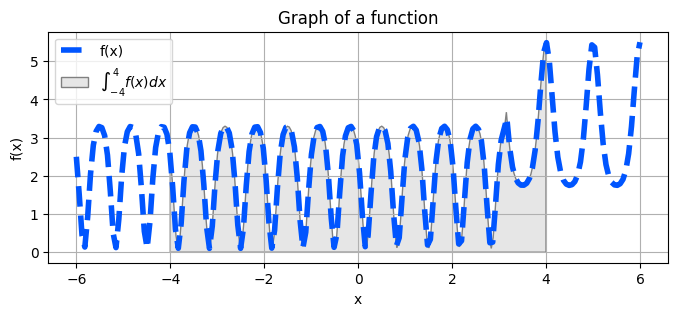

In [4]:
from matplotlib.patches import Polygon

# the x coordinates of where to plot the function
dense_values = np.linspace(-6, 6, 200)

# make a plot with a single axis , and specify the size of the figure
fig, ax = plt.subplots(figsize=(8, 3))

# list(map(f, dense_values))   -> f(dense_values) 

# plot the values of f(x) (from previous cell) at the specified x coordinates
# list(map(f, dense_values)) returns a list of values of function f() at dense_values
ax.plot(dense_values, list(map(f,dense_values)), label = 'f(x)',
         c = '#0055FF', lw=4, ls='--')


# define integral limits
a = -4
b = 4
# the x coordinates of where to plot the integral
ix = np.linspace(a, b, 200)
# the y coordinates of the integral
iy = list(map(f,ix))
# vertices of a polygon (see example below)
# x = [1, 2, 3] , y = [0, 9, 8] --> zip(x, y) --> [(1,0), (2, 9), (3, 8)]
# a = [(1,0), (2, 9), (3, 8)]  -> *a --> (1, 0), (2, 9), (3, 8)

verts = [(a, 0), *zip(ix, iy), (b, 0)]
# define a polygon
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', label = r'$\int^{{{}}}_{{{}}} f(x)dx$'.format(b,a))
# add it to the axis
ax.add_patch(poly)

# add the legend, grid, label the axis and the graph
ax.legend()
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Graph of a function")

plt.show()

Let's look at [`matplotlib.patches.Polygon`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html) a bit closer, in isolation.

As mentioned, adding a polygon to your figure needs to be done in three steps:
1. Use [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) which returns a reference to a [`matplotlib.figure.Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object and [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) object or objects, and allows you to directly manipulate the [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes)
2. Make a [`matplotlib.patches.Polygon`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html) object, independent of any [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), by passing in a list of (x,y) coordinates of the [`Polygon`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html), and the style parameters.
3. Add the [`Polygon`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Polygon.html) to the [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) with [`matplotlib.axes.Axes.add_patch()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html)

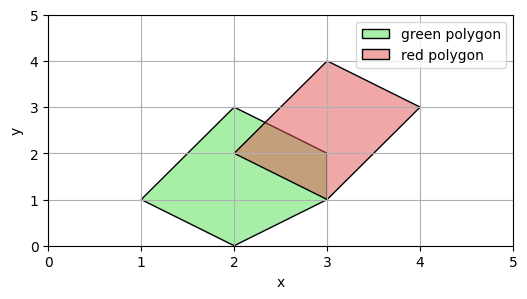

In [5]:
# use plt.subplots() to get a Figure and Axes object
fig, ax = plt.subplots(figsize=(6, 3))

# create a polygon by passing list of vertices and style params
green_poly = Polygon([(1, 1), (2, 3), (3, 2), (3, 1), (2, 0)],
                     facecolor='#50E05080', edgecolor='k', label = 'green polygon')

# add polygon to the axis
ax.add_patch(green_poly)

# create another polygon
red_poly_vertices = [(2, 2), (3, 4), (4, 3), (3, 1), (2, 2)]
red_poly = Polygon(red_poly_vertices,
                   facecolor = '#E0505080', edgecolor='k', label = 'red polygon')

# add polygon to the axis
ax.add_patch(red_poly)

# add legend, labels, ... make the graph pretty
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
ax.legend()

plt.show()

The second piece of new, advanced functionality we have used is _raw strings_. These are written prefixed with `r` and interpret backslashes and other escape characters as they are.

Most frequently, this is useful when writing file names. Compare the following two:

In [6]:
path1 = 'path\\to\\the\\thing\\n'
path2 = r'path\to\the\thing\n'

print("The first path is ", path1)

print("The second path is ", path2)

The first path is  path\to\the\thing\n
The second path is  path\to\the\thing\n


In the case of `matplotlib` labels, we can use to to pass simple $\LaTeX$ strings as labels, to format the maths symbols better.

For example:

$\int_{-4}^{4} f(x) dx$


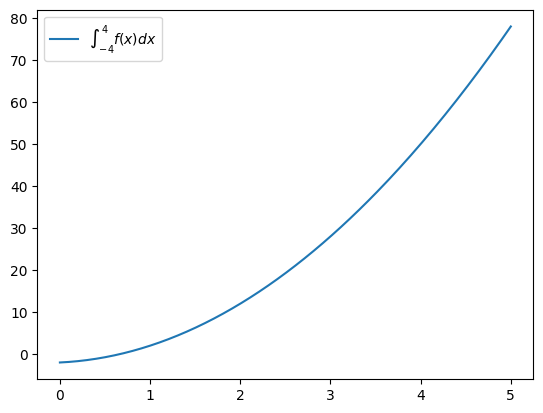

In [7]:
equation_label = r'$\int_{-4}^{4} f(x) dx$'
print(equation_label)

def f(x):
    return 3*x*x + x - 2

xs = np.linspace(0, 5, 200)
plt.plot(xs, list(map(f, xs)), label = equation_label)
plt.legend()
plt.show()

Last time, we talked about _interpolation_ using [`numpy.interp()`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html), which allowed us to do _linear_ interpolation only.

Let us now instead show interpolation with [`scipy.interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html), which allows us to perform different kinds of interpolation on 1D (time-series) data. The function inputs, outpus are a bit different between the `numpy` and `scipy` functions. On one hand, numpy evaluates the interpolated function on the passed `x_interpolated` values and returns the `y` values of the interpolated function.
> `numpy.interp(x_interpolated, x, y)`
>
> Perform a linear interpolation of the 1D function y=f(x) from the data points given in `x` and `y` (sparse sampling of the function), and return the _y_ values of this function for positions provided in `x_interpolated`

On the other hand, in `scipy`, [`interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) is a _class_, implementing an object which can be _evaluated_ with the `()` operand. 
> `scipy.interpolate.inerp1d(x, y, kind='linear')`
>
> Perform an interpolation of the 1D function y=f(x), using the kind of interpolation specified in `kind`. `kind` can be `"linear", "nearest", "nearest-up", "zero", "slinear", "quadratic", "cubic", "previous"`, or `"next"`.


In this example, we compare the different syntax between `scipy` and `numpy`, and we also show how a combination of interpolation and integration can be useful when processing unevenly spaced time series. In this example, we are given(fictional) house prices across the years for some area, and we would like to know the average house price in the area over the given period.

Compare the result when:
- just averaging all the house prices,
- calculating the average by first interpolating the house prices, and then integrating under the curve.


You can check the rest of the [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) module for even more advanced interpolation choices.

Average house price (interpolate+integrate): 116.04544836840716
Average house price (series average): 135.45454545454547


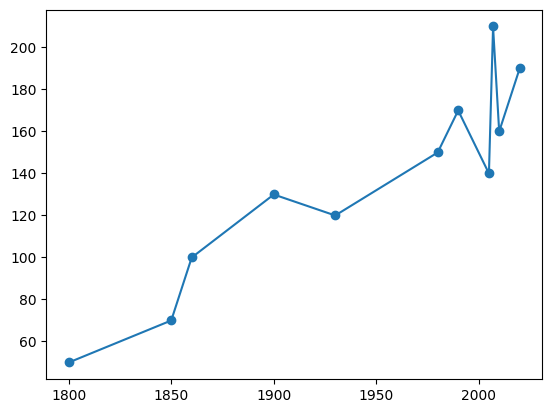

In [8]:
import warnings
warnings.filterwarnings('ignore')

from scipy.interpolate import interp1d

# defines our house prices
times =  [1800, 1850, 1860, 1900, 1930, 1980, 1990, 2005, 2007, 2010, 2020 ]
prices = [50, 70, 100, 130, 120, 150, 170, 140, 210, 160, 190]

# dense values at which to interpolate house prices
x_dense = np.linspace(1800, 2020, 2000)

# scipy interpolation:
# step 1: initialise the interp1d object -- which defines the interpolated function
f_interp = interp1d(times, prices, kind = 'linear')
# step 2: evaluate this function on all the dense timestamps at which we'd like to interpolate
y_dense_interp = f_interp(x_dense)

# numpy interpolation
# directly evaluated on dense values:
#y_dense_interp = np.interp(x_dense, times, prices)

plt.scatter(times, prices)
plt.plot(x_dense, y_dense_interp)

# calculate the average by integrating under the interpolated curve, and dividing by length of interval
avg_interp = quad(f_interp, 1800, 2020)[0]/(2020-1800)

# calculate the average by averaging the values in the series
avg_values = np.array(prices).mean()

print("Average house price (interpolate+integrate): {}".format(avg_interp))
print("Average house price (series average): {}".format(avg_values))

To check the difference between different kinds of interpolation, let's look at the example from the last lecture and observe the difference as we change the `kind`:

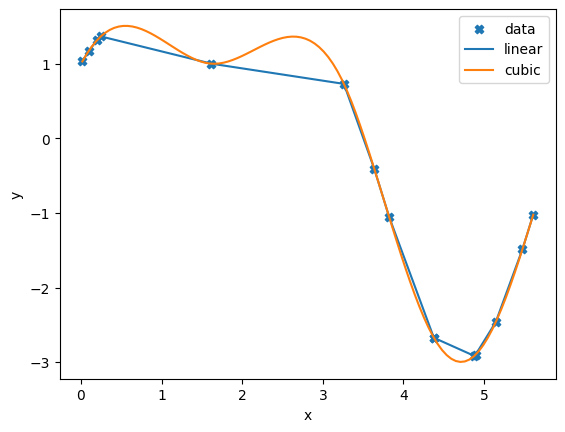

In [9]:
def f(x):
    return 2*np.sin(x) + np.cos(2*x)

# interval on which to sample the function
min_x = 0
max_x = 6
# initialise random number generator
rng = np.random.default_rng(0)
# get 15 sparse points from the interval [0, 6]
sparse_x = np.sort(rng.uniform(min_x, max_x, size = 15))
sparse_y = f(sparse_x)

# show the sparse points as data with scatter
plt.scatter(sparse_x, sparse_y, label='data', marker = 'X')

# correct the min_x and max_x for later approximations (during sampling, we probably didn't get the exact min/max vlaues)
min_x = np.amin(sparse_x)
max_x = np.amax(sparse_x)
# get dense points for plotting the underlying function
dense_x = np.linspace(min_x, max_x, 100)
#dense_y = f(dense_x)

# show the underlying continous function with plot
#plt.plot(dense_x, dense_y, linewidth = 1, color = 'black', label = 'f(x)')

f_linear = interp1d(sparse_x, sparse_y, kind = 'linear')
f_quadratic = interp1d(sparse_x, sparse_y, kind = 'quadratic')
f_cubic = interp1d(sparse_x, sparse_y, kind = 'cubic')

plt.plot(dense_x, f_linear(dense_x), label = 'linear')
#plt.plot(dense_x, f_quadratic(dense_x), label = 'quadratic')
plt.plot(dense_x, f_cubic(dense_x), label = 'cubic')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
                      
plt.show()

## Stats module

As data scientists, you will often find yourself using the [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module from [SciPy](https://docs.scipy.org/doc/scipy/) to analyse the statistical relationships between the data. We can import this module for use with:

In [10]:
from scipy import stats

### Categorical features

To start with, let us look at some frequency tables (also called _cross tabulations_ or _contingency tables_) describing the state of some metal objects we may have.

In [11]:
observations = np.array([[10, 6],
                         [20, 9],
                         [5, 3]])

observations_df = pd.DataFrame(observations, columns = ['shiny', 'dull'], index = ['marble', 'pin', 'scissors'])
observations_df

,shiny,dull
marble,10,6
pin,20,9
scissors,5,3


The data contains information about three types of objects: _marbles_, _pins_ and _scissors_. We can see that some of the objects in this collection are _shiny_ and some are _dull_. Based on this data, we could ask the question:

> Did our marbles, pins and scissors _go dull_ at the same rate? Is the proportion of _shiny_ to _dull_ objects the same, or different, for our different types of objects?

Or, you may "turn the question" (or the table) around and ask about the same relation in a different manner:
> Between our shiny and dull groups of objects, do the _marbles_ make up for the same portion of the objects? Is the proportion of _marbles_ to _pins_ to _scissors_ the same, or different, for our shiny and dull objects?

Or, more simply:
> Is the proportion of dull and shiny objects independent of the type of object?

To answer these types of questions for **categorical** data, we can use **chi-square test of independence**. Specifically, to apply this test to a contingency table, like the one we have, we can use [`scipy.stats.chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html):

> `scipy.stats.chi2_contingency(observed)`
>
> Tests the null-hypothesis that there are no differences between the classes (columns or rows) represented by the frequency in the contingency table. Returns, for the contingency table `observed` :
>
>    `chi2` (float)
>
>        The test statistic.
>    `p` (float)
>
>        The p-value of the test
>    `dof` (int)
>
>        Degrees of freedom
>    `expected` (ndarray, same shape as `observed`)
>
>        The expected frequencies, based on the marginal sums of the table.

Out of these values, the **p-value** is the important one. If $p < 0.05$, we reject the null hypothesis (_in different fields, a different p-value may be used_). That is, if $p < 0.05$, we can not claim that the observed classes are sampled independently from the same distribution (i.e. that the observed classes are the same). In other words, if $p \geq 0.05$, there may be some relation between the observed classes.

In [12]:
stats.chi2_contingency(observations_df)

Chi2ContingencyResult(statistic=0.2447660098522166, pvalue=0.8848094172313006, dof=2, expected_freq=array([[10.56603774,  5.43396226],
       [19.1509434 ,  9.8490566 ],
       [ 5.28301887,  2.71698113]]))

### Dataset

Today, we will be working with another [real world dataset](https://archive.ics.uci.edu/ml/datasets/Amphibians) (reduced for demonstration purposes). This data was gathered from natural inventories that were prepared for the environmental impact assessment of building two different motorways (roads), and it catalogues the presence of _amphibian species_ near water reservoirs. To run the rest of the lecture, download the file `amphi.csv` from blackboard. You are provided with the following data:

| Feature     | Type | Description     |
| :---        |:----   |          ---: |
| **Motorway**    | Categorical | Planned motorway   |
| **Surface** | Numerical        | Surface area of the water reservoir m$^2$ |
| **Number** | Numerical | Number of reservoirs in the area |
| **Type** | Categorical | Type of water reservoir |
| **Vegetation** | Categorical | Presence of vegetation |
| **Use** | Categorical | Use of the reservoir |
| **Fishing** | Categorical | Presence of fishing |
| **Green frogs** | Indicative (0 or 1) | Green frogs observed |
| **Brown frogs** | Indicative (0 or 1) | Brown frogs observed |
| **Common toad** | Indicative (0 or 1) | Common toads observed |

In [13]:
import pandas as pd

df = pd.read_csv('amphi.csv')
df

,Motorway,Surface,Number,Type,Vegetation,Use,Fishing,Green frogs,Brown frogs,Common toad
0,A1,600,1,1,4,0,0,0,0,0
1,A1,700,1,5,1,3,1,0,1,1
2,A1,200,1,5,1,3,4,0,1,1
3,A1,300,1,5,0,3,4,0,0,1
4,A1,600,2,1,4,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
184,S52,2300,1,12,3,0,0,0,1,0
185,S52,300,1,14,2,0,0,1,1,1
186,S52,500,1,1,4,0,0,1,1,1
187,S52,300,1,12,3,0,0,0,1,1


Following the previous example, we might want to check if the **type of vegetation** present in the reservoir is **independed of the type** of the reservoir. The first step is to calculate the _cross tabulation_ or the _contingency table_ between `'Type'` and `'Vegetation'`. We can do this using [`pandas.crosstab()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).

> `pandas.crosstab(rows, columns)`
>
> Calculates a cross tabulation between the data contained in `rows` and data contained in `columns`. The data passed through the `rows` argument will be used for grouping in the rows, and the data in the `columns` argument will be used for grouping in the columns.
>

In [14]:
crosstab = pd.crosstab(df.Type, df.Vegetation)
crosstab

Vegetation,0,1,2,3,4
Type,,,,,
1,22,28,25,28,13
2,3,0,1,0,0
5,3,6,3,0,0
7,0,1,0,0,0
11,0,0,0,2,2
12,0,1,1,8,13
14,0,4,4,2,0
15,2,15,1,1,0


Now we can check if the vegetation growing at the reservoirs is independed of the type of reservoir with [`scipy.stats.chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html):

In [15]:
_, p, _, _ = stats.chi2_contingency(crosstab)
print(p)
if p < 0.05:
    print("The presence of vegetation may not independent be of the type of water reservoir")
else:
    print("The presence of vegetation is independent of the type of water reservoir")
# The test rejects the hypothesis of independence when the p-value is less than or equal to 0.05. 

3.0687831853255403e-10
The presence of vegetation may not independent be of the type of water reservoir


Similarly, we might want to check **if the presence of the common toad is independent of the planned road** (is there a difference in the presence of the common toad along the planned motorways)?

In [16]:
crosstab = pd.crosstab(df['Common toad'], df.Motorway)
display(crosstab)
stats.chi2_contingency(crosstab)

Motorway     A1  S52
Common toad         
0            31   34
1            49   75


Chi2ContingencyResult(statistic=0.8569158383511278, pvalue=0.3546032139634211, dof=1, expected_freq=array([[27.51322751, 37.48677249],
       [52.48677249, 71.51322751]]))

**Note:** Our categorical feature `'Motorway'` here contains a string of numbers corresponding to the road designation. Sometimes, we might want to _encode_ our categorical data as numerical. The reasons might be many: easier work with NumPy arrays, privacy reasons, representing ordinal data.

First, we can get all the unique values in a [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) using [`pandas.Series.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html).
> `pandas.Series.unique()`
> 
> Returns: a list of unique values contained in the `Series`.

The get the number of unique values, we can use [`pandas.Series.nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html).

In [17]:
print(df.Motorway.unique())
print(df.Motorway.nunique()) # len(df.Motorway.unique())

['A1' 'S52']
2


Finally, we can replace these values with numerical (or any other) values using [`pandas.Series.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html):
> `pandas.Series.replace(to_replace, replace_with, inplace=False)`
>
> Replaces all values from the list `to_replace` with the value (or values) given in `replace_with`. By default, returns the copy of the series; if `inplace=True` the operation is done to the current series.

Specific for our example:

In [18]:
temp = df
temp['Motorway'] = df.Motorway.replace(['A1', 'S52'], [0, 1])
temp.head(2)

,Motorway,Surface,Number,Type,Vegetation,Use,Fishing,Green frogs,Brown frogs,Common toad
0,0,600,1,1,4,0,0,0,0,0
1,0,700,1,5,1,3,1,0,1,1


Or more general:

In [19]:
df['Motorway'].replace(df['Motorway'].unique(), np.arange(0, df['Motorway'].nunique()), inplace = True)
df['Motorway'].value_counts()

Motorway
1    109
0     80
Name: count, dtype: int64

## Numerical features

Let us now look at the relationship between the surface area of the reservoir and other features recorded in the dataset.

First, we need to determine what type of feature surface area is. For that, let's take a quick look at the [dataset](#Dataset) details above.

As this is a **numerical** variable, we need to determine whether it has any familiar _distribution_. (_Remember from stats:_ a lot of statistical tests assume a **normal distribution** of the underlying values)

Instead of a statistical test, we might first want to inspect our distribution visually. A simple way to do that, which we have learned in the last lecture, is using the [`matplotlib.pyplot.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) or [`matplotlib.axes.Axes.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) function which allows us to display a _histogram_.

When we initially display this histogram, we notice that one column is so tall we can barely see the contents of any other bins. In such cases, it might be useful to use a different scale, e.g. _logarithmic_ on the y-axis of your plot. You can do this with [`matplotlib.pyplot.yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) or [`matplotlib.axes.Axes.set_yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html) (depending on whether you are directly plotting using `matplotlib.pylot` functionality, or using an [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) object. (Equivalent functions exist for the x-axis.)

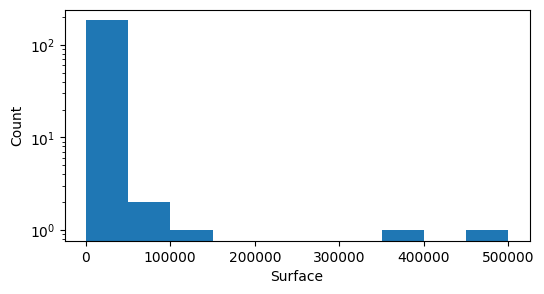

In [20]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.hist(df.Surface)
ax.set_xlabel('Surface')
ax.set_ylabel('Count')
ax.set_yscale('log')

plt.show()

To test if the data comes from a normal distribution, you can use **the Shapiro-Wilk test**. Specifically, it tests the null hypothesis that the data was drawn from a normal distribution. This is implemented in [`scipy.stats.shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html):

> `scipy.sats.shapiro(x)`
>
> Performs the Shapiro-Wilk test which tests the null-hypothesis that the data `x` is drawn from a normal distribution. Returns:
>
>    `statistic` (float)
>
>        The test statistic.
>    `p` (float)
>
>        The p-value of the test

Again, we are **mostly interested in the p-value**. If $p < 0.05$, we _reject the hypothesis_ that the data comes from a normal distribution. If $p \geq 0.05$, the data _may have come_ from a normal distribution.

In [21]:
stats.shapiro(df['Surface'])

ShapiroResult(statistic=0.18577134609222412, pvalue=5.8349071375224e-28)

Based on the previously shown histogram, it was obvious our _Surface_ data did not come from a normal distribution. To show how the function works on data which actually comes from a normal distribution, we will randomly draw some data from a normal distribution:

To "draw" some data randomly from a normal distribution, we can use [`numpy.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

> `numpy.random.normal(mean, stdev, size = None)`
>
> Returns `size` random samples sampled from a normal (Gaussian) distribution with mean `mean` and standard deviation `stdev`.

ShapiroResult(statistic=0.9986920952796936, pvalue=0.683226466178894)


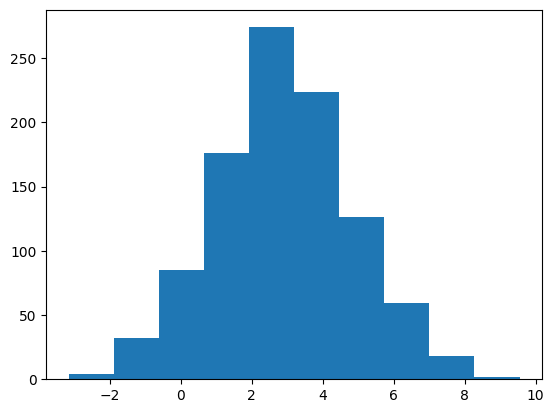

In [22]:
data = np.random.normal(3, 2, size = 1000)
plt.hist(data)
print(stats.shapiro(data))
plt.show()

### Grouping numerical features

If we want to examine the relationship between a **numerical and a categorical** feature, it does not make sense to look for an _increasing_ or a _decreasing_ relationship.

Analysing the relationship between e.g. surface area of the reservoir with the type of vegetation growing starts by looking at the _differences_ between the distribution in surface area according to the type of vegetation.

First, let us select all the recorded surface areas of reservoirs with vegetation types 0, 1 and 2, calculate and print their medians.

In [23]:
vt0 = df[df.Vegetation == 0].Surface
vt1 = df[df['Vegetation'] == 1]['Surface']
vt2 = df[df['Vegetation'] == 2]['Surface']

print(vt0.median(), vt1.median(), vt2.median())

1400.0 300.0 700.0


While the medians look quite different, we might want to take a closer look. One way to do that visually is using [`matplotlib.axes.Axes.boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html), shown in the last lecture:

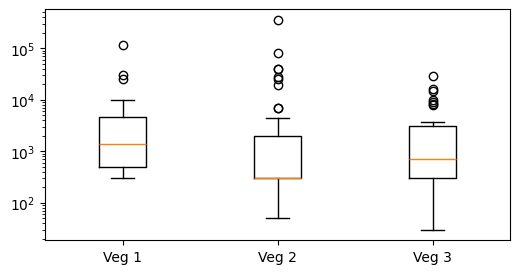

In [24]:
fig, ax = plt.subplots(figsize=(6, 3))

categories = ['Veg 1', 'Veg 2', 'Veg 3']
data = [vt0, vt1, vt2]

ax.boxplot(data, labels = categories)
ax.set_yscale('log')

plt.show()

From the boxplot, we can be reasonably certain that the median surface areas of our water bodies differ depending on the type of vegetation. However, when the relationship is not as clear from the visualisation, we can also use a statistical test to check the equality of population medians.

If the surface area was **normally distributed**, we could use **ANOVA**. Since it is not (and nor are the smaller selections of it -- we would normally need to check each subset separetely!), we need to use a test that does not assume a normal distribution.

**The Kruskal-Wallis H-test** tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. It is implemented in [`scipy.stats.kruskal()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

> `scipy.stats.kruskal(*samples)`
>
> Performs the Kruskal-Wallis H-test on the `samples`, testing the null-hypothesis that the medians of all the groups given in `samples` are equal.  Returns:
>
>    `statistic` (float)
>
>        The test statistic.
>    `p` (float)
>
>        The p-value of the test

Again, we are mostly interested **in the p-value**. If $p < 0.05$ we _reject_ the hypothesis that the group medians are equal. If $p \geq 0.05$, these groups may have come from populations with the same median.

In [25]:
stats.kruskal(vt0, vt1, vt2)

groups = [vt0, vt1, vt2]
# * [a, b, c] --> a,  b, c

stats.kruskal(*groups)

KruskalResult(statistic=7.362377125636825, pvalue=0.025193013554127813)

Instead of manually selecting each type of vegetation, we can use [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) first to obtain groupings by all vegetation types. 

Following a `groupby()` function, we need a way to aggregate: some way to collect all the samples. In this case, we do not want their mean, max or average, but rather just the _list_ of all the samples. We can obtain this by using [`pandas.DataFrame.apply()`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), by applying the operator `list` (which just attempts to represent all values given as a list) to the group.

Vegetation
0    [300, 500, 1600, 800, 500, 1100, 31000, 25000,...
1    [700, 200, 200, 750, 7000, 1700, 300, 7000, 45...
2    [700, 300, 3800, 300, 400, 1000, 100, 30, 400,...
3    [8000, 30000, 2500, 1700, 30000, 7000, 3300, 2...
4    [600, 600, 200, 200, 300, 1000, 7000, 80000, 2...
Name: Surface, dtype: object
KruskalResult(statistic=9.94969658544354, pvalue=0.04128361514047516)


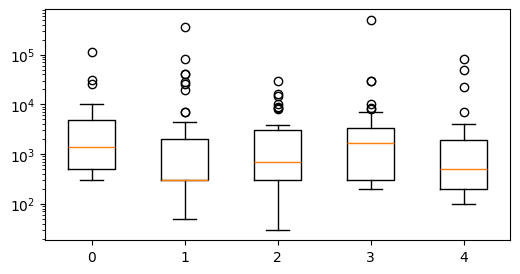

In [34]:
surface_per_veg_type = df.groupby('Vegetation').Surface.apply(list)
print(stats.kruskal(*surface_per_veg_type))


fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot(surface_per_veg_type, labels = sorted(df.Vegetation.unique()))
ax.set_yscale('log')
plt.show()

While our example from the dataset was not **normally distributed**, we are sometimes likely to encouter that type of data. For examples, repeated readings from an instrument may come from a normal distribution centered around the real value of the measured quantity, with some Gaussian noise.

In the case of normally distributed features, the appropriate test to use is **ANOVA**, implemented in [`scipy.stats.f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

> `scipy.stats.f_oneway(*samples)`
>
> Performs the oneway ANOVA on the `samples`, testing the null-hypothesis that the groups given in `samples` have the same population mean.  Returns:
>
>    `statistic` (float)
>
>        The test statistic.
>    `p` (float)
>
>        The p-value of the test

Again, we are mostly interested **in the p-value**. If $p < 0.05$ we _reject_ the hypothesis that the groups have the same means. If $p \geq 0.05$, these groups may have come from populations with the same mean.

ShapiroResult(statistic=0.9223390221595764, pvalue=0.20910175144672394)
F_onewayResult(statistic=0.0033842020386449993, pvalue=0.9540233038560536)


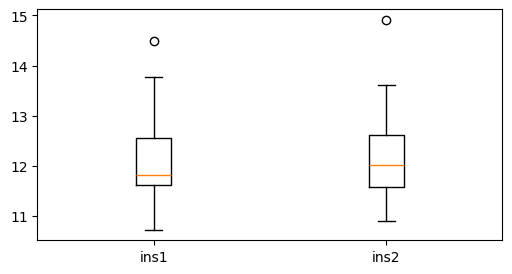

In [27]:
instrument_1 = np.random.normal(12, size = 15)
instrument_2 = np.random.normal(12, size = 15)

#print(instrument_1)
#print(instrument_2)

print(stats.shapiro(instrument_1))
print(stats.shapiro(instrument_2))
print(stats.f_oneway(instrument_1, instrument_2))

fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot([instrument_1, instrument_2], labels = ['ins1', 'ins2'])
plt.show()

### Correlation coefficients

Similarly to the difference between [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) and [Kruskal-Wallis H-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html), different correlation coefficients between numerical variables assume (or do not assume) **an underlying normal distribution**.

For **normally distributed data**, and if looking for **linear correlation**, we can use the **Pearson's correlation coefficient**, implemented in [`scipy.stats.pearsonr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html):

> `scipy.stats.pearsonr(x, y)`
>
> Calculates the Pearson's correlation coefficient which measures the linear relationship between `x` and `y`. It also tests the null-hypothesis that `x` and `y` are uncorrelated and normally distributed.
>
>    `statistic` (float)
>
>        The correlation coefficient. Goes from -1 to 1.
>    `p` (float)
>
>        The p-value.

Here, we are interested in **both the correlation coefficient and the p-value**. So, with $p<0.05$, we _reject_ the _hypothesis_ (the features are uncorrelated) and _accept_ the _alternative_ (that the correlation is non-zero). Small p-values and large (absolute) values of correlation indicate strong (positive or negative) correlation; large p-values and small values of correlation indicate no correlation.

Similarly, if our data is **not normally distributed**, or if the relationship we are looking for is **monotonic, but not linear**, we can use **Spearman rank-order correlation coefficient**, implemented in [`scipy.stats.spearmanr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html):

> `scipy.stats.spearmanr(x, y)`
>
> Calculates the Spearman rank-order correlation coefficient which measures the monotonic relationship between `x` and `y`. It does not assume that `x` and `y` are normally distributed. It tests the null-hypothesis that `x` and `y` are uncorrelated.
>
>    `correlation` (float)
>
>        The correlation coefficient. Goes from -1 to 1.
>    `p` (float)
>
>        The p-value.

The interpretation of the correlation coefficient and the p-value is similar to Pearson's coefficient.

Finally, we may want to look at the relationship between **two numerical features**, such as `'Surface'` (surface area of the reservoirs) and `'Number'` (number of lakes in the reservoirs).

Let us first check if they come from normal distributions. We can check either visually...

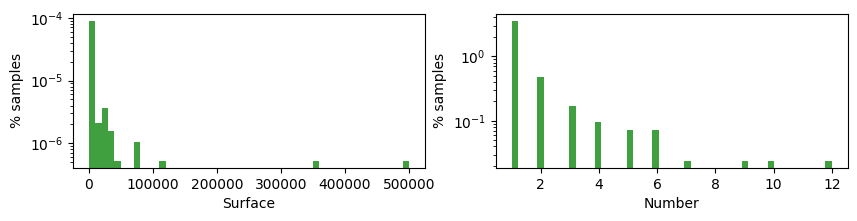

In [28]:
#feature = 'volatile acidity'

fig, axs = plt.subplots(1, 2, figsize = (10, 2))

n0, bins0, patches0 = axs[0].hist(df.Surface,
                            bins=50, range=(df.Surface.min(), df.Surface.max()), density=True, facecolor='g', alpha=0.75)
axs[0].set_ylabel('% samples')
axs[0].set_xlabel('Surface')
axs[0].set_yscale('log')

n1, bins1, patches1 = axs[1].hist(df.Number,
                            bins=50, range=(df.Number.min(), df.Number.max()), density=True, facecolor='g', alpha=0.75)
axs[1].set_ylabel('% samples')
axs[1].set_xlabel('Number')
axs[1].set_yscale('log')                                     
plt.show()

... or using a statistical test [`scipy.stats.shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html):

In [29]:
print(stats.shapiro(df['Surface']))
print(stats.shapiro(df['Number']))

ShapiroResult(statistic=0.18577134609222412, pvalue=5.8349071375224e-28)
ShapiroResult(statistic=0.4237852692604065, pvalue=2.6086237796161145e-24)


Since they do not, it would be appropirate to use [**Spearman rank-order correlation coefficient**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html):

In [30]:
print(stats.spearmanr(df['Surface'], df['Number']))

SignificanceResult(statistic=0.4987221624456451, pvalue=2.8064659656186824e-13)


While [**Pearson's correlation coefficient**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) can still be very high if the _relationship_ between the data is _linear_ (with noise):

PearsonRResult(statistic=0.9735657253460555, pvalue=5.43867023544121e-13)


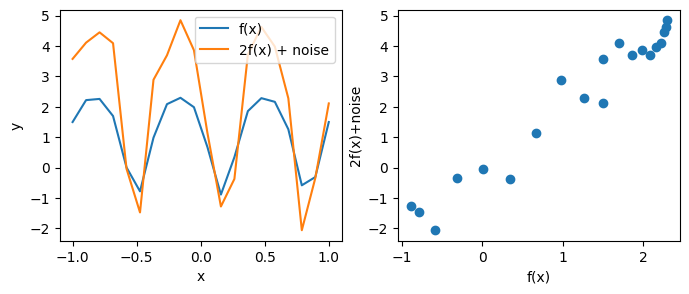

In [31]:
def f(x):
    return -1.2*np.power(3, np.sin(3 * x * np.pi)) + 2.7

xs = np.linspace(-1, 1, 20)
dataf = f(xs)
noise = np.random.normal(0, 0.5, len(xs))
datanoisy = 2*dataf + noise
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(xs, dataf, label = 'f(x)')
ax[0].plot(xs, datanoisy, label = '2f(x) + noise')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(dataf, datanoisy)
ax[1].set_xlabel('f(x)')
ax[1].set_ylabel('2f(x)+noise')

print(stats.pearsonr(dataf, datanoisy))

plt.show()

... it can be quite missleading if the underlying distributions are nor normal:

ShapiroResult(statistic=0.9973369240760803, pvalue=0.6042602062225342)
ShapiroResult(statistic=0.7523777484893799, pvalue=1.0711436097606734e-26)
PearsonRResult(statistic=0.8590146218632158, pvalue=6.524718173768067e-147)


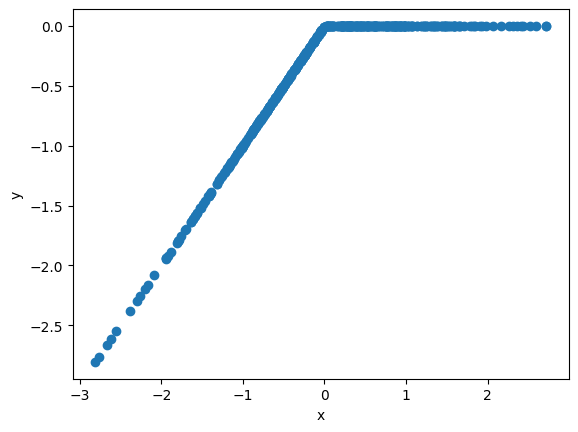

In [32]:
x = np.random.normal(size = 500)
print(stats.shapiro(x))

y = np.where(x < 0, x, 0)
print(stats.shapiro(y))

print(stats.pearsonr(x, y))

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Finally, while the [Pearson's coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) can only measure the **linear** relationship between the data, the [Spearman's coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) can also find **monotonic, but non-linear** relationships:

PearsonRResult(statistic=0.999994577681366, pvalue=0.0)
SignificanceResult(statistic=0.9999839679358717, pvalue=0.0)
PearsonRResult(statistic=0.7261691878166995, pvalue=4.5514252710353104e-83)
SignificanceResult(statistic=0.9995841263365052, pvalue=0.0)


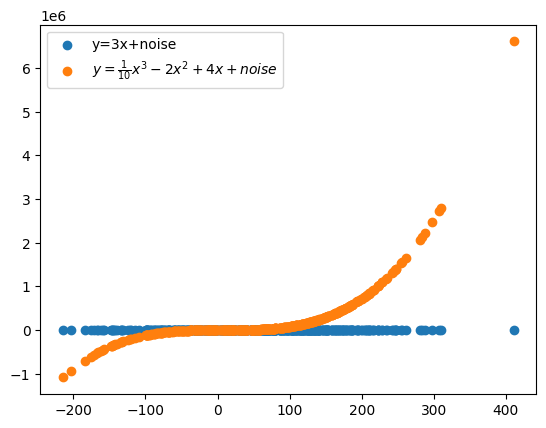

In [33]:
x = np.random.normal(50, 100, size = 500)

noise = np.random.normal(0, 1, len(x))

y = 3*x+noise

plt.scatter(x, y, label = 'y=3x+noise')

print(stats.pearsonr(x, y))
print(stats.spearmanr(x, y))

y = 0.1*x**3 - 2*x**2 + 4*x + noise

plt.scatter(x, y, label = r'$y=\frac{1}{10}x^3 - 2x^2 + 4x + noise$')

print(stats.pearsonr(x, y))
print(stats.spearmanr(x, y))

plt.legend()
plt.show()

## References

[1] _Blachnik, Marcin, Marek Sołtysiak, and Dominika Dąbrowska. "Predicting presence of amphibian species using features obtained from gis and satellite images." ISPRS International Journal of Geo-Information 8, no. 3 (2019): 123._